# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn import linear_model


In [2]:
# Your code here.
student_data = {
    'StudentID': [1,2,3,4,5,6,7,8,9,10], 
    'Age':[17,51,27,21,36,48,19,26,54,30], 
    'Tardies':[10,1,5,9,4,2,9,6,0,3]
}

student_data = pd.DataFrame(student_data)

Draw a dispersion diagram (scatter plot) for the data.

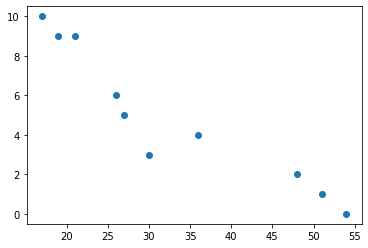

In [3]:
# Your code here.
plt.scatter(student_data['Age'],student_data['Tardies'])
plt.show()


Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [4]:
# Your response here. 

"""
R: yes, the two variables seem to be negatively correlated, since as age increases, tardiness
decreases.
"""


'\nR: yes, the two variables seem to be negatively correlated, since as age increases, tardiness\ndecreases.\n'

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [5]:
# Your response here.

#correlation:

display(student_data.corr(method='pearson'))


#covariance:

display(np.cov(student_data))



#correlation -0.939163
#covariance 

#the variables are negatively correlated which means as one increases the other one decreases. Additionally the
#value registered shows that there is indeed a strong relationship among variables 



,StudentID,Age,Tardies
StudentID,1.000000,0.186190,-0.347113
Age,0.186190,1.000000,-0.939163
Tardies,-0.347113,-0.939163,1.000000


array([[ 64.33333333, 187.5       ,  92.66666667,  66.83333333,
        118.5       , 159.66666667,  46.66666667,  68.33333333,
        169.5       ,  74.33333333],
       [187.5       , 817.        , 379.        , 238.        ,
        520.        , 727.        , 181.        , 314.        ,
        819.        , 389.5       ],
       [ 92.66666667, 379.        , 177.33333333, 113.66666667,
        241.        , 335.33333333,  85.33333333, 144.66666667,
        375.        , 176.66666667],
       [ 66.83333333, 238.        , 113.66666667,  76.33333333,
        151.        , 207.66666667,  55.66666667,  89.33333333,
        228.        , 104.83333333],
       [118.5       , 520.        , 241.        , 151.        ,
        331.        , 463.        , 115.        , 200.        ,
        522.        , 248.5       ],
       [159.66666667, 727.        , 335.33333333, 207.66666667,
        463.        , 649.33333333, 159.33333333, 280.66666667,
        735.        , 351.66666667],
       [ 4

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [6]:
# Your response here.
model = linear_model.LinearRegression()


Plot your regression model on your scatter plot.

In [7]:
# Your code here.

x = student_data[['Age']]
y = student_data['Tardies']
result = model.fit(x,y)
display(result.intercept_)
display(result.coef_)

12.888803363135771

array([-0.24282077])

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

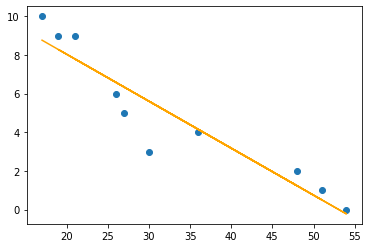

0.8820265558250109

In [8]:
# Your response here. 
regression_line = result.intercept_ + result.coef_[0]*x
plt.plot(x, regression_line, c = 'orange')
plt.scatter(x,y)
plt.show()


result.score(x,y)


#there is a strong causal relationship among variables
#additionally, the very strong R shows that the variable age explains about 88% of the 
#tardiness factor

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [10]:
# Import any libraries you may need & the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn import linear_model

vehicles = pd.read_csv('vehicles.csv')

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [14]:
# Your response here. 
vehicles = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year','Combined MPG','Fuel Cost/Year', 'CO2 Emission Grams/Mile']]
vehicles.head()


,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
0,1984,4.0,19.388824,17,1950,522.764706
1,1984,6.0,25.354615,13,2550,683.615385
2,1985,4.0,20.600625,16,2100,555.437500
3,1985,6.0,25.354615,13,2550,683.615385
4,1987,6.0,20.600625,16,2550,555.437500


In [13]:
vehicles.corr()
#Fuel Barrels/year & combined MPG 
#Fuel cost/year is connected with the first mentioned variable so it wouldn't be relevant

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

769.8882836465673

array([-0.32061673,  1.87879976, 19.05292507, -3.04039938,  0.03230948])

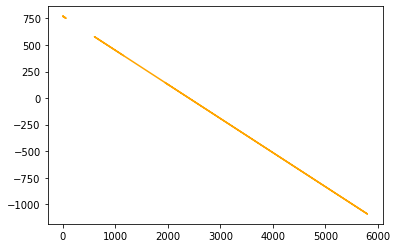

In [17]:
# Your response here. 
x = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
y = vehicles['CO2 Emission Grams/Mile']

result = model.fit(x,y)

display(result.intercept_)
display(result.coef_)

regression_line = result.intercept_ + result.coef_[0]*x
plt.plot(x, regression_line, c = 'orange')
plt.show()




In [18]:
result.score(x,y)

0.9808734920269122

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [ ]:
# Your response here. 
"""
The variables explain for approximatelly 98% of the variation of the outcomes variable, hence it seems like it is a 
valid model.
"""

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [19]:
# Your code here.
party = {
'x': [1,3,4,6,8,9,11,14],
'y': [1,2,4,4,5,7,8,13]
}

data = pd.DataFrame(party)

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

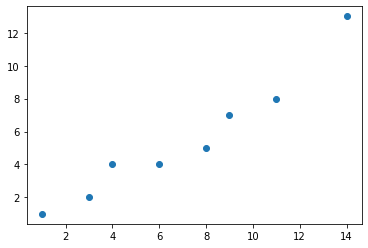

-0.43939393939393945

array([0.84848485])

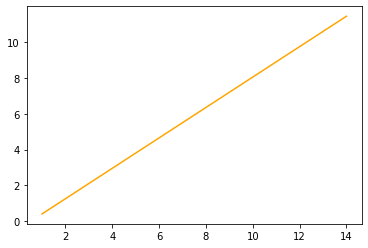

In [24]:
# Your code here.
model = linear_model.LinearRegression()

plt.scatter(data['x'],data['y'])
plt.show()

x = data[['x']]
y = data['y']

result = model.fit(x,y)

display(result.intercept_)
display(result.coef_)

regression_line = result.intercept_ + result.coef_[0]*x
plt.plot(x, regression_line, c='orange')
plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [ ]:
# Your response here. 
"""
the host was correct, the two variables are positively related.
"""


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [36]:
# Your response here. 

data['z'] = data['x'] - data['y']
data['z']

#so 2 is an outlier and it doesn't add anything to have the 0 there 

data = data.iloc[[1,3,4,5,6,7]]

1    1
3    2
4    3
5    2
6    3
7    1
Name: z, dtype: int64

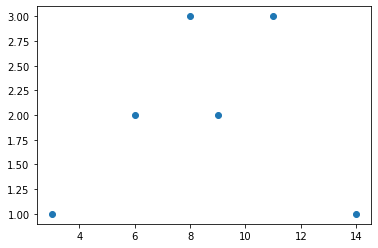

1.7687074829931975

array([0.02721088])

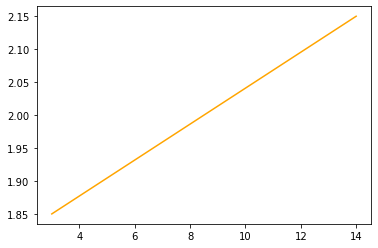

In [38]:
plt.scatter(data['x'],data['z'])
plt.show()

x = data[['x']]
z = data['z']

result = model.fit(x,z)

display(result.intercept_)
display(result.coef_)

regression_line = result.intercept_ + result.coef_[0]*x
plt.plot(x, regression_line, c='orange')
plt.show()



What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 
#without the problematic point, the sample size decreased and as such the generalization implications also decreased. 
#On the other hand, error decreased, because now the model doesn't include the outliers